#$Import$

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# Evaluation 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

#$Data$

In [ ]:
data = pd.read_csv("/content/Possum Regression.csv")

In [ ]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
data.pop("case")

0        1
1        2
2        3
3        4
4        5
      ... 
99     100
100    101
101    102
102    103
103    104
Name: case, Length: 104, dtype: int64

In [ ]:
data.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
np.unique(data["Pop"])

array(['Vic', 'other'], dtype=object)

In [ ]:
labs_pop = {
    "Vic":0,
    "other":1
}
labs_sex ={
    "m":0,
    "f":1
}

In [ ]:
data["Pop"] = data["Pop"].map(labs_pop)
data["sex"] = data["sex"].map(labs_sex)

In [ ]:
data.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
# Checking Null values
data.isnull().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

#$Feature$ $importance$

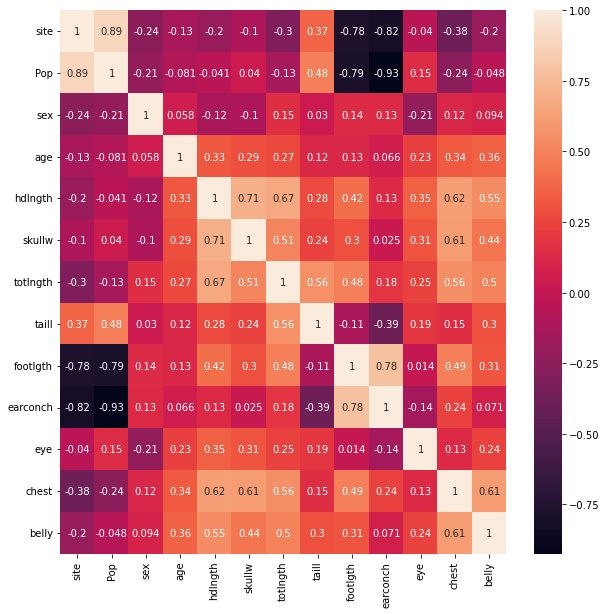

In [ ]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
# sns.pairplot(data)

In [ ]:
Y_data = data.pop("age")
X_data = data 
from sklearn.ensemble import RandomForestRegressor
r = RandomForestRegressor()
r.fit(X_data,Y_data)

RandomForestRegressor()

In [ ]:
imp = r.feature_importances_

In [ ]:
imp

array([0.01421707, 0.00145314, 0.00770448, 0.37929193, 0.16781627,
       0.0565532 , 0.03670556, 0.10737372, 0.06489944, 0.07029124,
       0.05489435, 0.03879959])

In [ ]:
cols_name = data.columns

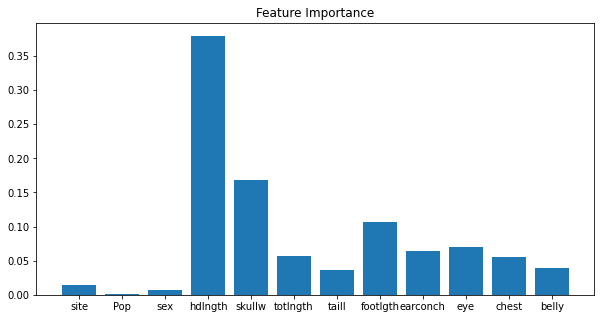

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(cols_name,imp)
plt.title("Feature Importance")
plt.show()

In [ ]:
data = data.drop(["site","Pop","sex"],axis=1)

In [ ]:
data.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#$Models$

##$Preprocessing$

In [ ]:
Y_data

0      8.0
1      6.0
2      6.0
3      6.0
4      2.0
      ... 
99     1.0
100    1.0
101    6.0
102    4.0
103    3.0
Name: age, Length: 101, dtype: float64

In [ ]:
X_data = data
X_data

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...
99,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
sc = StandardScaler()
X_data = sc.fit_transform(X_data)

In [ ]:
X_data[:5]

array([[ 0.39109073,  1.11412086,  0.41444055, -0.53494434,  1.38946687,
         1.57574755,  0.14192757,  0.46533378,  1.2384409 ],
       [-0.06588875,  0.20717389,  1.01310325, -0.28008878,  0.9340518 ,
         0.75895648,  0.90138108,  0.71400422,  0.13314608],
       [ 0.36252951,  0.98455701,  1.97096356,  0.994189  ,  1.59440365,
         0.93221519,  0.42672264,  1.46001552,  0.50157768],
       [ 0.13403977,  0.04521907,  1.13283579,  0.48447789,  1.75379893,
         1.00646892,  0.14192757,  0.46533378,  0.50157768],
       [-0.35150092, -0.21390864, -0.42368722, -0.53494434,  0.5924905 ,
         1.25398137,  0.04699589,  0.71400422,  0.13314608]])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.3)

##$Linear$ $Regression$

In [ ]:
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)
r2_LR = r2_score(Y_test,y_pred)
rmse_LR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_LR} RMSE : {rmse_LR}")

R2 : -0.1543647358665179 RMSE : 1.900221903908708


##$Polynomial$ $Regression$

In [ ]:
PR = Pipeline([
               ("PF",PolynomialFeatures(degree=1)),
               ("LR",LinearRegression())
])
PR.fit(X_train,Y_train)

Pipeline(steps=[('PF', PolynomialFeatures(degree=1)),
                ('LR', LinearRegression())])

In [ ]:
y_pred = PR.predict(X_test)
r2_PR = r2_score(Y_test,y_pred)
rmse_PR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_PR} RMSE : {rmse_PR}")

R2 : -0.15436473586651855 RMSE : 1.9002219039087087


##$RandomForest$

In [ ]:
RFR = RandomForestRegressor(n_estimators=100,max_depth=1,min_samples_leaf=5,random_state=42)
RFR.fit(X_train,Y_train)

RandomForestRegressor(max_depth=1, min_samples_leaf=5, random_state=42)

In [ ]:
y_pred = RFR.predict(X_test)
r2_RFR = r2_score(Y_test,y_pred)
rmse_RFR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_RFR} RMSE : {rmse_RFR}")

R2 : 0.22774942290216504 RMSE : 1.5542179308054391


In [ ]:
params = {
    "n_estimators":[100,300,500],
    "max_depth":[1,5,7,10],
    "min_samples_leaf":[1,5,10]
}

In [ ]:
RFR_gs = RandomForestRegressor()

In [ ]:
GS = GridSearchCV(RFR_gs,params,cv=5)
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 5, 7, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [ ]:
GS.best_params_

{'max_depth': 1, 'min_samples_leaf': 5, 'n_estimators': 100}

In [ ]:
RFR_GS = GS.best_estimator_
y_pred = RFR_GS.predict(X_test)
r2_RFR_GS = r2_score(Y_test,y_pred)
rmse_RFR_GS = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_RFR_GS} RMSE : {rmse_RFR_GS}")

R2 : 0.2245407038311974 RMSE : 1.557443489497974


##$SVM$

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf",C=5,degree=1)
svr.fit(X_train,Y_train)
y_pred = svr.predict(X_test)
r2_svr = r2_score(Y_test,y_pred)
rmse_svr = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_svr} RMSE : {rmse_svr}")

R2 : 0.0007272093745440689 RMSE : 1.767969731208198


In [ ]:
params = {
    "kernel":["linear","rbf"],
    "degree":[1,3,5,10],
    "C":[1,5,7,10]
}
svr_gs = SVR()
GS = GridSearchCV(svr_gs,params,cv=5)
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 5, 7, 10], 'degree': [1, 3, 5, 10],
                         'kernel': ['linear', 'rbf']})

In [ ]:
SVR_GS = GS.best_estimator_
y_pred = SVR_GS.predict(X_test)
r2_SVR_GS = r2_score(Y_test,y_pred)
rmse_SVR_GS = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_SVR_GS} RMSE : {rmse_SVR_GS}")

R2 : 0.12631337984171764 RMSE : 1.65314381549503


##$DecisionTree$

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=1,min_samples_leaf=5)
DTR.fit(X_train,Y_train)
y_pred = DTR.predict(X_test)
r2_DTR = r2_score(Y_test,y_pred)
rmse_DTR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_DTR} RMSE : {rmse_DTR}")

R2 : 0.2323439566329878 RMSE : 1.5495875945473576


##$Adaboost$

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,learning_rate=1)
ada.fit(X_train,Y_train)
y_pred = ada.predict(X_test)
r2_ada = r2_score(Y_test,y_pred)
rmse_ada = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_ada} RMSE : {rmse_ada}")

R2 : -0.031270791749833604 RMSE : 1.796053020267749


#$Comparision$

In [ ]:
models = ["LR","PR","RF","SVR","DT","AdaB"]
r2s = [r2_LR,r2_PR,r2_RFR,r2_svr,r2_DTR,r2_ada]
rmses = [rmse_LR,rmse_PR,rmse_RFR,rmse_svr,rmse_DTR,rmse_ada]
max_r2 = np.max(r2s)
min_rmse = np.min(rmses)

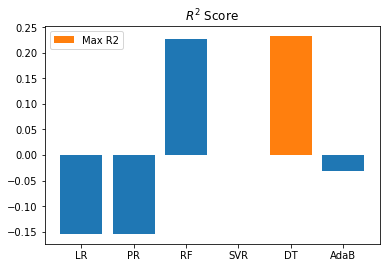

In [ ]:
plt.bar(models,r2s)
plt.bar(models[r2s.index(max_r2)],max_r2,label="Max R2")
plt.legend()
plt.title("$R^2$ Score")
plt.show()

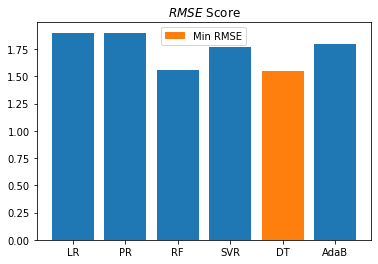

In [ ]:
plt.bar(models,rmses)
plt.bar(models[rmses.index(min_rmse)],min_rmse,label="Min RMSE")
plt.legend()
plt.title("$RMSE$ Score")
plt.show()